# Chicago Crime Rate Prediction  -- Modeling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [2]:
datas = pd.read_csv('crime_data.csv',header=0)
datas.head()

,Date,Block,Primary Type,Location Description,Arrest,Community Area,Year
0,03/18/2015 07:44:00 PM,047XX W OHIO ST,BATTERY,STREET,False,25.0,2015
1,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,True,67.0,2015
2,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,BATTERY,APARTMENT,False,39.0,2015
3,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,40.0,2015
4,03/18/2015 09:00:00 PM,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,25.0,2015


In [3]:
datas.shape 

(6130365, 7)

Text(0, 0.5, 'Crime Type')

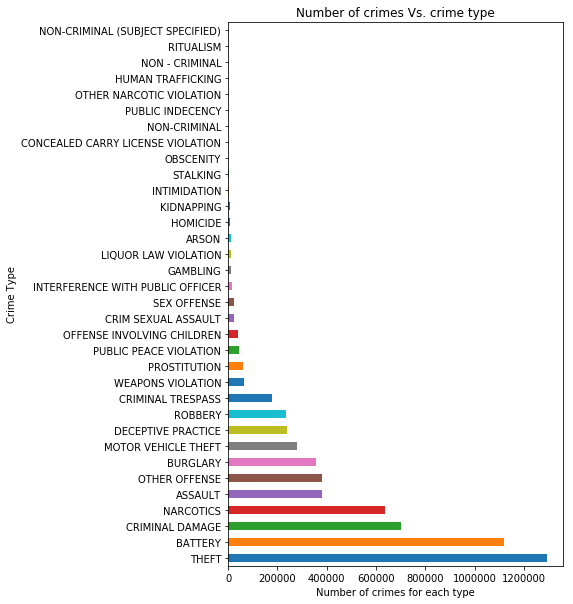

In [4]:
counts_type = datas['Primary Type'].value_counts().sort_values(ascending = False)
counts_type

plt.rcParams['figure.figsize'] = [6, 10]
counts_type.plot(kind='barh')
plt.title('Number of crimes Vs. crime type')
plt.xlabel('Number of crimes for each type')
plt.ylabel('Crime Type')


In [13]:
counts_community = datas['Community Area'].value_counts().sort_index()
comName = code['COMMUNITY'].values
counts_community.index = comName
counts_community = counts_community.sort_values(ascending = False)
counts_community.head()

AUSTIN             390375
NEAR NORTH SIDE    209104
SOUTH SHORE        200490
HUMBOLDT PARK      193930
WEST TOWN          180990
Name: Community Area, dtype: int64

Text(0, 0.5, 'Community Name')

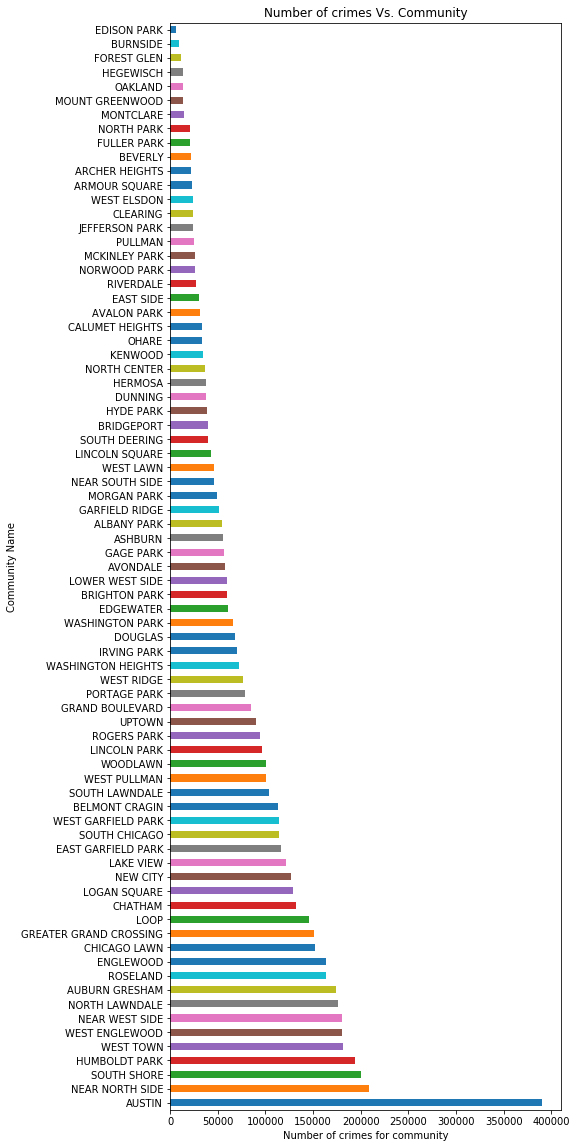

In [14]:
plt.rcParams['figure.figsize'] = [7, 20]
counts_community.plot(kind='barh', linewidth=10.0)

plt.title('Number of crimes Vs. Community')
plt.xlabel('Number of crimes for community')
plt.ylabel('Community Name')

In [6]:
population = pd.read_csv('population.csv',header=0)

population.head()

,Geog,GeogKey,Total Population,Population Rate
0,Rogers Park,1,54991,0.020
1,West Ridge,2,71942,0.027
2,Uptown,3,56362,0.021
3,Lincoln Square,4,39493,0.015
4,North Center,5,31867,0.012


In [7]:
population.shape 

(77, 4)

In [8]:
counts_community = datas['Community Area'].value_counts().sort_index()
# comName = code['COMMUNITY'].values
# counts_community.index = comName
# counts_community = counts_community.sort_values(ascending = False)
counts_community.head()

1.0    93901
2.0    76596
3.0    89710
4.0    42980
5.0    36776
Name: Community Area, dtype: int64

In [15]:
DF = pd.DataFrame()
comName = code['COMMUNITY'].values
DF['Count'] = counts_community.values
DF['Population Rate'] = population['Population Rate'].values
DF.index = comName
DF.head()

,Count,Population Rate
ROGERS PARK,390375,0.020
WEST RIDGE,209104,0.027
UPTOWN,200490,0.021
LINCOLN SQUARE,193930,0.015
NORTH CENTER,180990,0.012


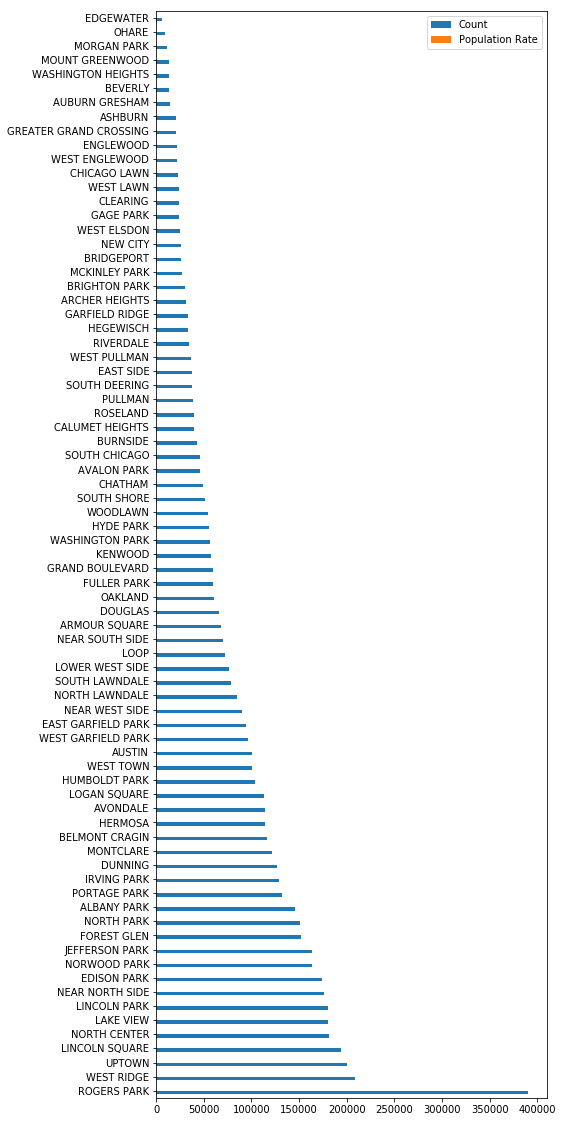

In [16]:
DF.plot(kind='barh', linewidth=10.0)

In [11]:
code = pd.read_csv('community_code.csv',header=0)
code.head()

,AREA_NUMBE,COMMUNITY
0,1,ROGERS PARK
1,2,WEST RIDGE
2,3,UPTOWN
3,4,LINCOLN SQUARE
4,5,NORTH CENTER


In [12]:
code.shape 

(77, 2)

In [17]:
com_datas = pd.read_csv('com_datas.csv',header=0)
com_datas.head()

,Community Name,Population Rate,Time,Day,Date,Count
0,ROGERS PARK,0.02,Morning,Weekday,01/01/2002,0.000021
1,ROGERS PARK,0.02,Morning,Weekday,01/01/2003,0.000106
2,ROGERS PARK,0.02,Morning,Weekday,01/01/2004,0.000064
3,ROGERS PARK,0.02,Morning,Weekday,01/01/2007,0.000053
4,ROGERS PARK,0.02,Morning,Weekday,01/01/2008,0.000106


In [18]:
com_datas.shape 

(1516689, 6)

In [19]:
com_datas_int = pd.read_csv('com_datas_int.csv',header=0)
com_datas_int.head()

,Community Name,Population Rate,Time,Day,Date,Count,Class
0,1,0.02,1,1,01/01/2002,2,low
1,1,0.02,1,1,01/01/2003,10,high
2,1,0.02,1,1,01/01/2004,6,high
3,1,0.02,1,1,01/01/2007,5,high
4,1,0.02,1,1,01/01/2008,10,high


In [20]:
com_datas_int.shape 

(1516689, 7)

In [21]:
Y = com_datas_int['Count']
cols = ['Community Name', 'Time', 'Day']
X = com_datas_int.drop(['Date', 'Count', 'Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted values for y')

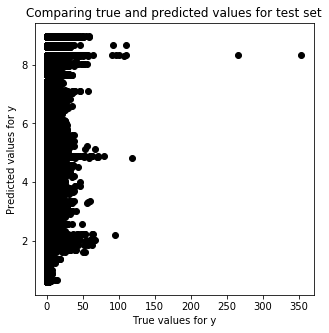

In [23]:
import matplotlib.pyplot as plt
# Apply model to the test set
y_pred_test = regr.predict(X_test)
plt.rcParams['figure.figsize'] = [5,5]
# Comparing true versus predicted values
plt.scatter(Y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

In [24]:
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(Y_test, y_pred_test))

Root mean squared error = 3.2576
R-squared = 0.2064


In [25]:
# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing

# Plot outputs


Slope =  [ 2.38773950e-02  2.11455115e+02  3.25570850e-01 -5.41098504e-02]
Intercept =  -0.6806655423844354


In [26]:
Y = com_datas_int['Class']
cols = ['Community Name', 'Time', 'Day']
X = com_datas_int.drop(['Date', 'Count', 'Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [27]:
numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test Accuracy =', accuracy_score(Y_test, Y_pred))

Test Accuracy = 0.8107507137252834


In [28]:
# Y = com_datas_int['Class']
# cols = ['Community Name', 'Time', 'Day']
# X = com_datas_int.drop(['Date', 'Count', 'Class'],axis=1)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [29]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
tree_acc

0.7407973943258016

Best hyperparameter, maxdepth = 15
Test Accuracy = 0.8107507137252834


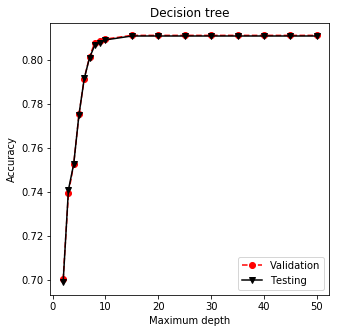

In [30]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

numFolds = 5
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])


bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

### nearest neighbor classifier

[0.7437734474414679, 0.7900625704659489, 0.7955960018197522, 0.8030200634275956, 0.8046008083392123, 0.8054439272362843, 0.8073188983905742]


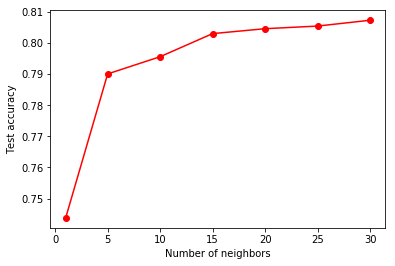

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

print(knn_acc)

In [32]:
print(max(knn_acc))

0.8073188983905742


### linear classifiers

In [37]:
# from sklearn import linear_model
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt
# clf = linear_model.LogisticRegression(C=10)
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# logistic_acc = accuracy_score(Y_test, Y_pred)
# print(logistic_acc)
# clf = SVC(C=10,kernel='linear')
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# svm_acc = accuracy_score(Y_test, Y_pred)

# methods = ['Dtree', 'Logistic', 'SVM']
# acc = [tree_acc, logistic_acc, svm_acc]
# plt.bar([1.5,2.5,3.5],acc)
# plt.xticks([1.5,2.5,3.5], methods)
# plt.ylabel('Test accuracy')


In [36]:
# from sklearn import neural_network

# clf = neural_network.MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
#                                   max_iter=2000, random_state=1)
# clf = clf.fit(X_train, Y_train.ravel())
# Y_pred = clf.predict(X_test)
# nn_acc = accuracy_score(Y_test, Y_pred)
# print(nn_acc)
# methods = ['Dtree', 'Logistic', 'SVM', 'Neural Network']
# acc = [tree_acc, logistic_acc, svm_acc, nn_acc]
# plt.bar([1.5,2.5,3.5,4.5],acc)
# plt.xticks([1.5,2.5,3.5,4.5], methods)
# plt.ylabel('Test accuracy')
# plt.ylim([0.4,0.8])